<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

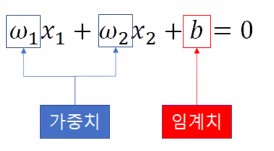

단층 퍼셉트론으로 두 개의 입력으로 구성한 or, and , xor 논리 회로의 결과를 판별하는 코드를 작성해보자

In [1]:
#[[x1,x2,y],[x1,x2,y],...]
#0:False, 1:True
ds_or = [[0,0,0],[0,1,1],[1,0,1],[1,1,1]]
ds_and = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]
ds_xor = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]

In [2]:
#구해야 하는 값은 x1의 가중치 w1, x2의 가중치 w2, 그 외에 y에 영향을 주는 것 b(편향, 임계치)
s1, s2, b = 0,0,0
def setwb(wt1,wt2,bt) : #w1, w2, b를 원하는 값으로 설정하는 함수(원하는 값은 테스트 값)
  global w1,w2,b
  w1,w2,b = wt1, wt2, bt

In [3]:
def discriminate(x1,x2): #판별식
  if (w1*x1 + w2*x2 + b<=0): #판별식보다 같거나 아래쪽이면 거짓
    return 0
  else: #판별식보다 크면 참
    return 1

In [8]:
def test(ds, wt1, wt2, bt): #ds에 있는 데이터를 wt1, wt2, bt를 적용했을 때 성적을 테스트하는 함수
  setwb(wt1, wt2, bt) #테스트할 wt1,wt2,bt로 설정
  ok, total = 0,0 #맞춘 개수와 전체 데이터 개수를 기억할 변수를 0으로 초기화
  for x1, x2, y in ds:
    if discriminate(x1,x2) == y:
      ok+=1
    total+=1
  return ok/total #스코어를 반환

In [4]:
def myr(s,e,st): #range와 같은 목적의 함수, step이 실수
  r = s
  while(r<e):
    yield r #myr 함수를 for문의 in 뒤에 표현했을 때 for와 in 사이의 변수가 갖는 값
    r+=st

In [5]:
def find_wb(ds): #기계 학습 함수
  for wt1 in myr(0,1,0.1):
    for wt2 in myr(0,1,0.1):
      for bt in myr(-1,1,0.1):
        if test(ds,wt1,wt2,bt)==1.0: #모든 테스트를 했을 때 성적이 100점일 때
          return True #성공
  return False #실패 (실제 Deep Learning에서는 가장 높은 점수를 받은 가중치와 편향으로 결정)

In [10]:
print(find_wb(ds_or))
print(f'w1:{w1} w2:{w2} b:{b}')
print(find_wb(ds_and))
print(f'w1:{w1} w2:{w2} b:{b}')
print(find_wb(ds_xor))

True
w1:0.1 w2:0.1 b:-1.3877787807814457e-16
True
w1:0.1 w2:0.1 b:-0.10000000000000014
False
